In [6]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_target = [1]*35 + [0] *14
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fish_data,fish_target, stratify=fish_target)

print(X_train.shape)
print(y_train.shape)

(36, 2)
(36,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

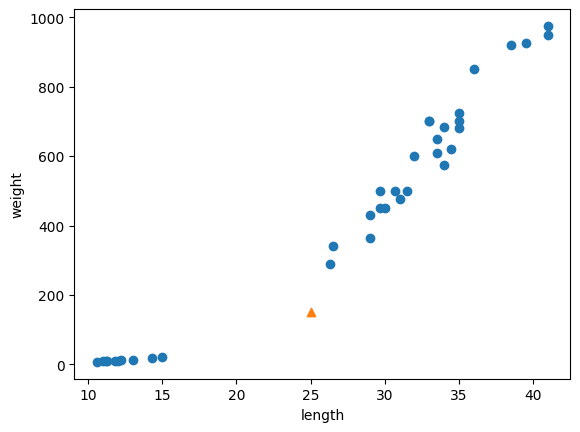

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[[130.48375378 130.73859415 138.32150953 138.39320793 140.00603558]] [[ 1 18 24 20 12]]


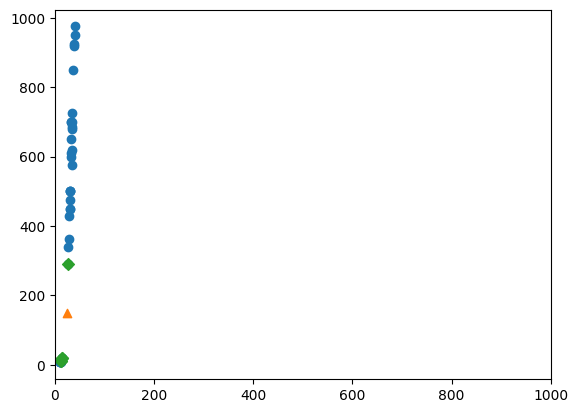

In [31]:
distance, indexes = model.kneighbors([[25,150]])
print(distance, indexes)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(X_train[indexes,0], X_train[indexes,1], marker='D')
plt.xlim((0,1000))
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.transform([[25,150]])

scaled_model = KNeighborsClassifier()
scaled_model.fit(X_train_scaled, y_train)
scaled_model.score(X_test_scaled, y_test)

# 스케일 문제를 해결하여 예측한 특출나게 작은 도미
scaled_model.predict(scaler.transform([[25,150]]))


array([1])

[[0.46105476 0.61871615 0.78366084 0.97139034 1.05868212]] [[12 10 32 19  6]]


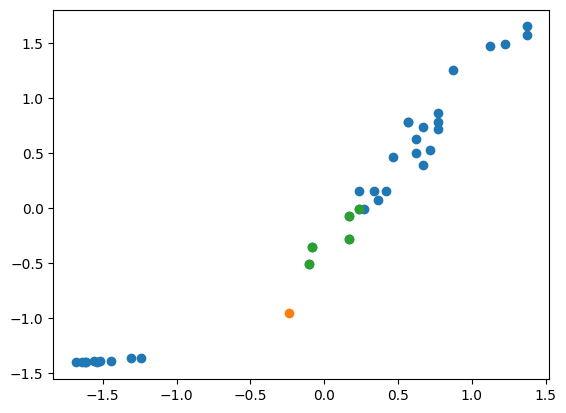

In [35]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])
plt.scatter(scaler.transform([[25,150]])[:,0],scaler.transform([[25,150]])[:,1])

distance, indexes = scaled_model.kneighbors(scaler.transform([[25,150]]))
print(distance, indexes)

plt.scatter(X_train_scaled[indexes,0], X_train_scaled[indexes,1])
